In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text
import numpy as np
import pickle
import polars as pl
from matplotlib import pyplot as pt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
file = pl.read_csv("../../data/preprocessedData.csv")
file.head(3)

temp,feelsLike,pressure,humidity,clouds,windSpeed,windDir,gustSpeed,result
f64,f64,f64,f64,f64,f64,f64,f64,i64
35.6,36.9,978.0,35.0,100.0,3.05,220.0,4.0,1
34.4,35.3,979.0,37.0,100.0,0.78,144.0,2.0,1
33.3,34.8,981.0,42.0,100.0,2.02,78.0,2.02,1


In [3]:
x = file.drop('result')
y = file['result']

In [4]:
x_train, x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=99)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [6]:
randomForestClassifier = RandomForestClassifier(n_estimators=99, random_state=99)
randomForestClassifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=99, random_state=99)

In [7]:
x_test

array([[-0.29762375, -0.26996059,  0.08060794, ...,  0.2304302 ,
         0.24420818, -0.21076516],
       [ 0.78918553,  1.46235135, -0.24303505, ..., -1.14953837,
        -1.90674825, -0.21076516],
       [ 0.3779604 ,  0.33057422, -0.24303505, ...,  0.75226706,
        -0.22394116,  0.48096415],
       ...,
       [-0.12138441,  0.23818425,  1.77973366, ...,  2.88020179,
         0.13033402,  2.21028744],
       [-0.76759533, -0.87049539,  0.16151869, ..., -0.94660181,
        -0.38842606, -1.19647943],
       [-0.00389151,  0.14579428, -1.29487478, ...,  1.34368216,
         0.21890281,  0.34261829]])

In [8]:
predict = randomForestClassifier.predict(x_test)

column_dict = {
  "original": y_test, 
  "predicted": predict
}

prediction_csv = pl.DataFrame(column_dict)

prediction_csv.write_csv("prediction_result.csv")

In [9]:
accuracy = accuracy_score(predict, y_test)
confusion_matrix = confusion_matrix(predict, y_test)

print(f'Accuracy_score: {accuracy}')
print(f'\nConfusion Matrix: \n {confusion_matrix}')

Accuracy_score: 0.8922155688622755

Confusion Matrix: 
 [[617  86]
 [ 58 575]]


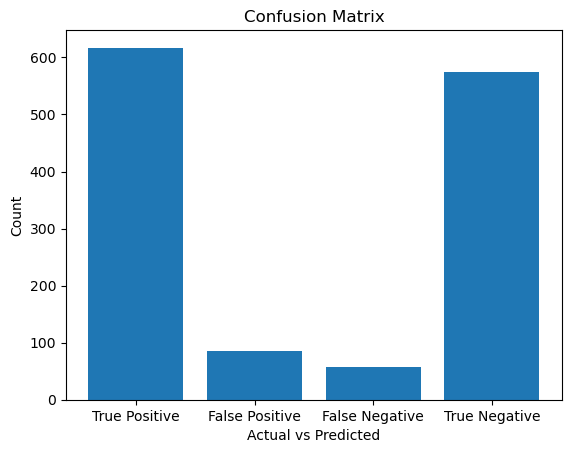

In [10]:
labels = np.array(['True Positive', 'False Positive', 'False Negative', 'True Negative'])
values = np.array([confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]])

pt.bar(labels, values)
pt.xlabel("Actual vs Predicted")
pt.ylabel("Count")
pt.title("Confusion Matrix")
pt.show()

In [11]:
for i in range(0, 99):
  estimator = randomForestClassifier.estimators_[i]
  tree_rules = export_text(estimator, feature_names=list(x.columns))
  with open("trueRules.txt", 'a') as file:
    file.write(f"Tree {i+1} Rules: /n/n")
    file.write(tree_rules + "/n/n/n")

In [12]:
with open("model.pickle", 'wb') as file:
  pickle.dump(randomForestClassifier, file)